In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

# Path to the directory containing your "cat" and "dog" folders
base_dir = "./training/training"

# List of subdirectories (cat and dog)
subdirectories = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']

# Load and preprocess images
images = []
labels = []

for label, subdirectory in enumerate(subdirectories):
    subdirectory_path = os.path.join(base_dir, subdirectory)
    
    if not os.path.exists(subdirectory_path):
        print(f"Subdirectory '{subdirectory}' not found.")
        continue
    
    image_files = os.listdir(subdirectory_path)
    
    for file_name in image_files:
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            image_path = os.path.join(subdirectory_path, file_name)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (128, 128))  # Resize the images to a common size
            
            images.append(img)
            labels.append(label)

# Convert lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_test[].shape)
# Display the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (877, 128, 128, 3)
Testing data shape: (220, 128, 128, 3)


In [2]:
y_train[:]

array([0, 0, 5, 5, 7, 2, 5, 4, 7, 1, 5, 4, 8, 2, 3, 4, 8, 9, 5, 6, 5, 6,
       7, 5, 4, 8, 0, 5, 4, 9, 8, 1, 5, 0, 3, 1, 1, 3, 2, 0, 5, 3, 2, 6,
       3, 5, 4, 8, 6, 4, 6, 3, 2, 3, 0, 4, 0, 6, 6, 8, 8, 7, 4, 1, 4, 2,
       1, 4, 5, 4, 4, 3, 3, 2, 8, 4, 7, 8, 1, 5, 3, 7, 3, 6, 5, 0, 1, 2,
       2, 8, 3, 8, 7, 6, 3, 3, 5, 5, 0, 7, 8, 9, 2, 7, 2, 7, 2, 2, 3, 5,
       2, 3, 9, 9, 2, 7, 4, 0, 0, 0, 6, 2, 1, 6, 6, 3, 0, 0, 6, 0, 4, 7,
       5, 8, 3, 4, 3, 3, 0, 2, 4, 0, 0, 4, 6, 2, 9, 5, 9, 2, 5, 2, 5, 2,
       4, 1, 9, 9, 6, 1, 9, 4, 2, 4, 2, 7, 0, 4, 1, 6, 3, 0, 3, 4, 7, 9,
       2, 3, 1, 7, 6, 6, 2, 9, 7, 6, 8, 1, 9, 4, 4, 5, 3, 4, 9, 0, 3, 1,
       6, 3, 8, 2, 3, 5, 4, 8, 3, 6, 6, 4, 8, 6, 9, 6, 8, 5, 9, 6, 7, 7,
       1, 2, 4, 7, 1, 8, 0, 1, 2, 9, 8, 5, 4, 0, 5, 1, 9, 9, 5, 2, 3, 7,
       7, 5, 8, 8, 7, 0, 3, 3, 3, 2, 8, 9, 5, 4, 7, 9, 1, 1, 4, 1, 4, 4,
       5, 9, 0, 9, 1, 3, 4, 2, 7, 2, 0, 2, 1, 2, 8, 3, 1, 4, 8, 6, 6, 4,
       1, 3, 7, 1, 0, 6, 1, 8, 1, 5, 1, 6, 5, 4, 0,

In [3]:
subdirectories[1]

'n1'

In [4]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(subdirectories[y[index]])

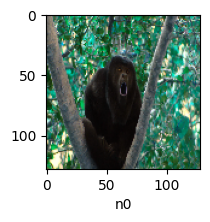

In [5]:
plot_sample(X_test,y_train,0)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
ann = models. Sequential ([layers. Flatten (input_shape=(128,128,3)),layers. Dense (3000, activation='relu'),layers. Dense (1000, activation='relu'),layers.Dense (10, activation='sigmoid')])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=30)


Epoch 1/30
28/28 [==============================] - 1s 24ms/step - loss: 2.5980 - accuracy: 0.1562
Epoch 2/30
28/28 [==============================] - 1s 24ms/step - loss: 2.0631 - accuracy: 0.2634
Epoch 3/30
28/28 [==============================] - 1s 24ms/step - loss: 1.8977 - accuracy: 0.3216
Epoch 4/30
28/28 [==============================] - 1s 23ms/step - loss: 1.8173 - accuracy: 0.3683
Epoch 5/30
28/28 [==============================] - 1s 23ms/step - loss: 1.6747 - accuracy: 0.4265
Epoch 6/30
28/28 [==============================] - 1s 23ms/step - loss: 1.5668 - accuracy: 0.4766
Epoch 7/30
28/28 [==============================] - 1s 23ms/step - loss: 1.4488 - accuracy: 0.5017
Epoch 8/30
28/28 [==============================] - 1s 24ms/step - loss: 1.3167 - accuracy: 0.5906
Epoch 9/30
28/28 [==============================] - 1s 24ms/step - loss: 1.2691 - accuracy: 0.5747
Epoch 10/30
28/28 [==============================] - 1s 23ms/step - loss: 1.2170 - accuracy: 0.6055
Epoch 11/

In [8]:
ann.predict(np.array(images))

35/35 [==============================] - 0s 6ms/step


array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.1951504e-38, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [9]:
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np
y_pred =ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

7/7 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        26
           1       0.80      0.22      0.35        18
           2       0.88      0.62      0.73        24
           3       0.53      0.65      0.59        26
           4       0.26      0.37      0.30        19
           5       0.61      0.55      0.58        20
           6       0.61      0.48      0.54        23
           7       0.36      0.73      0.48        22
           8       0.71      0.50      0.59        20
           9       0.61      0.50      0.55        22

    accuracy                           0.53       220
   macro avg       0.59      0.52      0.52       220
weighted avg       0.59      0.53      0.53       220



In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
28/28 [==============================] - 2s 24ms/step - loss: 2.3553 - accuracy: 0.1551
Epoch 2/10
28/28 [==============================] - 0s 18ms/step - loss: 1.6910 - accuracy: 0.4128
Epoch 3/10
28/28 [==============================] - 0s 17ms/step - loss: 1.1331 - accuracy: 0.6454
Epoch 4/10
28/28 [==============================] - 0s 18ms/step - loss: 0.6550 - accuracy: 0.8039
Epoch 5/10
28/28 [==============================] - 0s 18ms/step - loss: 0.3116 - accuracy: 0.9202
Epoch 6/10
28/28 [==============================] - 0s 17ms/step - loss: 0.1966 - accuracy: 0.9555
Epoch 7/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0710 - accuracy: 0.9875
Epoch 8/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0405 - accuracy: 0.9943
Epoch 9/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 10/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0070 - accuracy: 1.0000


In [13]:
cnn.evaluate(X_test,y_test)

7/7 [==============================] - 0s 23ms/step - loss: 1.7968 - accuracy: 0.6136


[1.7967549562454224, 0.6136363744735718]

In [14]:
pre=cnn.predict(X_test)
pre

7/7 [==============================] - 0s 6ms/step


array([[5.31138062e-01, 1.73669483e-04, 1.20629065e-05, ...,
        7.03024762e-06, 2.10738755e-04, 3.92994076e-01],
       [1.90558866e-01, 1.22477259e-05, 1.41555342e-04, ...,
        1.16317339e-01, 4.88734961e-01, 1.45550044e-02],
       [4.49418753e-01, 6.95088511e-06, 1.84255828e-08, ...,
        4.90939510e-06, 8.78551102e-04, 5.47479808e-01],
       ...,
       [9.46626130e-07, 2.46361906e-05, 2.60231991e-06, ...,
        1.36483604e-05, 2.48143711e-04, 1.09448808e-06],
       [5.00883912e-09, 1.36864939e-04, 3.49426061e-01, ...,
        6.27238810e-01, 2.18830146e-02, 2.29572139e-09],
       [3.18467871e-16, 1.21956306e-10, 1.00000000e+00, ...,
        9.44284120e-14, 1.09455969e-13, 1.23972430e-16]], dtype=float32)

In [15]:
np.argmax(pre[2])

9

In [16]:
y_classes=[np.argmax(element)for element in pre]
np.array(y_classes[:5])

array([0, 8, 9, 5, 8], dtype=int64)

TypeError: only integer scalar arrays can be converted to a scalar index

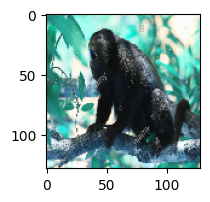

In [17]:
plot_sample(X_test,pre,2)

In [18]:
subdirectories[y_classes[2]]

'n9'

In [19]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.65      0.61      0.63        18
           2       0.79      0.79      0.79        24
           3       0.64      0.69      0.67        26
           4       0.70      0.37      0.48        19
           5       0.50      0.70      0.58        20
           6       0.67      0.61      0.64        23
           7       0.50      0.36      0.42        22
           8       0.50      0.80      0.62        20
           9       0.57      0.59      0.58        22

    accuracy                           0.61       220
   macro avg       0.62      0.61      0.60       220
weighted avg       0.63      0.61      0.61       220



In [20]:
cnn.save("raj")

INFO:tensorflow:Assets written to: raj\assets


INFO:tensorflow:Assets written to: raj\assets


In [21]:
import tensorflow as tf

In [22]:
model = tf.keras.models.load_model('raj')

In [23]:
a=model.predict(np.array(X_test))

7/7 [==============================] - 0s 46ms/step


In [ ]:
y_classes=[np.argmax(element)for element in a]
np.array(y_classes[:5])

In [ ]:
import cv2
cap= cv2.VideoCapture(0)

while True:
    _,img= cap.read()
    img=cv2.resize(img,(128,128))
    img = np.expand_dims(img, axis=0)
    
    c=model.predict(img)
    print(c)
    cv2.imshow("img",img)
    cv2.waitKey(1)
    
    